In [1]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Bild in Graustufen einlesen

In [2]:
# read image as grayscale
img = cv2.imread('hd2.jpg', 0)
print("Shape: ", img.shape)
#plt.imshow(img, cmap='gray');

Shape:  (1080, 2400)


### Kernel im Ortsraum (klein)

In [3]:
kernel_size = 8
x = cv2.getGaussianKernel(kernel_size, 2)
gauss_kernel = x*x.T

#plt.imshow(gauss_kernel, cmap='gray');

### Kernel im Ortsraum (groß)

In [4]:
# In die Größe des Bildes einbetten
top = int((img.shape[0]/2) - kernel_size/2)
bottom = int((img.shape[0]/2) - kernel_size/2)
left = int((img.shape[1]/2) - kernel_size/2)
right = int((img.shape[1]/2) - kernel_size/2)
gauss_groß = cv2.copyMakeBorder(gauss_kernel, top, bottom, left, right, cv2.BORDER_CONSTANT, 0)
#plt.imshow(gauss_groß, cmap='gray');

### Gefiltertes Bild im Ortsraum (Frequenzraumgefiltert)

Kernel_DFT: 
OpenCV:  [0.99994373 0.00290873]
Numpy:  (0.9999438005803951+0.0029087268133329556j)

Img_DFT: 
OpenCV:  [-13187943.   -2009307.2]
Numpy:  (-13187942.962001048-2009307.3035003694j)

Multipliziert: 
OpenCV:  [-1.3187201e+07 -5.8445342e+03]
Numpy:  (-13181357.281230886-2047554.504902383j)
OpenCV_Mulspectrum:  [-13181356.   -2047554.4]


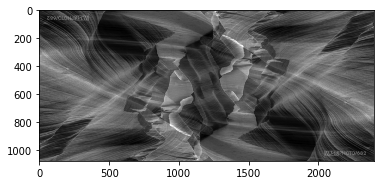

In [10]:
# Shift the kernel
kernel_shift = np.fft.fftshift(gauss_groß)

# Transform kernel in fourier domain
kernel_opencv = cv2.dft(np.float32(kernel_shift),flags = cv2.DFT_COMPLEX_OUTPUT)
kernel_numpy = np.fft.fft2(kernel_shift)


print("Kernel_DFT: ")
print("OpenCV: ",kernel_opencv[1][0])
print("Numpy: ",kernel_numpy[1][0])


# Transform image in fourier domain
img_opencv = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
img_numpy = np.fft.fft2(img)

print("\nImg_DFT: ")
print("OpenCV: ",img_opencv[1][0])
print("Numpy: ",img_numpy[1][0])


# Multiplikation
mult_opencv = kernel_opencv* img_opencv
mult_numpy = kernel_numpy*img_numpy
mult_spec = cv2.mulSpectrums(kernel_opencv, img_opencv,0)

print("\nMultipliziert: ")
print("OpenCV: ",mult_opencv[1][0])
print("Numpy: ",mult_numpy[1][0])
print("OpenCV_Mulspectrum: ",mult_spec[1][0])


# OpenCV inverse DFT false
img_back_opencv = cv2.idft(mult_opencv)
img_back_opencv = cv2.magnitude(img_back_opencv[:,:,0],img_back_opencv[:,:,1])

# Numpy inverse DFT
img_back_numpy = np.fft.ifft2(mult_numpy)
img_back_numpy = np.real(img_back_numpy)

# OpenCV inverse DFT with multSpectrum
img_back_spec = cv2.idft(mult_spec)
img_back_spec = cv2.magnitude(img_back_spec[:,:,0],img_back_spec[:,:,1])


plt.imshow(img_back_opencv, cmap='gray');